In [19]:
import numpy as np  # Import the NumPy library, which is used for numerical operations

# Import the to_categorical function from Keras, which is used to convert class vectors to binary class matrices
from keras.utils import to_categorical 

# Import the CIFAR-10 dataset from Keras datasets module
from keras.datasets import cifar10  

# Load the CIFAR-10 dataset. The dataset is split into training and testing sets.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define the number of classes in the CIFAR-10 dataset
NUM_CLASSES = 10

# Normalize the training data to be in the range [0, 1] by dividing by 255.0
x_train = x_train.astype('float32') / 255.0

# Normalize the testing data to be in the range [0, 1] by dividing by 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the training labels to one-hot encoded vectors
y_train = to_categorical(y_train, NUM_CLASSES)

# Convert the testing labels to one-hot encoded vectors
y_test = to_categorical(y_test, NUM_CLASSES)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 37s 0us/step


In [21]:
x_train[54, 12, 13, 1] 

#x_train: The training dataset containing CIFAR-10 images.
#[54]: Indexes the 55th image in the training dataset.
#[12, 13]: Indexes the pixel at row 13 and column 14 (0-based indexing) of the 55th image.
#[1]: Indexes the green channel of the pixel (since CIFAR-10 images are in RGB format, channels are 0: Red, 1: Green, 2: Blue).
#The value 0.36862746 indicates the intensity of the green channel at the specified pixel location of the 55th image after normalization.

0.36862746

In [23]:
#Building the Model
#In Keras there are two ways to define the structure of your neural network: as a Sequential model or using the Functional API.

In [25]:
#A Sequential model is useful for quickly defining a linear stack of layers (i.e., where one layer follows on directly from the previous layer without any branching). How‐ ever, many of the models in this book require that the output from a layer is passed to multiple separate layers beneath it, or conversely, that a layer receives input from multiple layers above it.

In [27]:
#To be able to build networks with branches, we need to use the Functional API, which is a lot more flexible. I recommend that even if you are just starting out building lin‐ ear models with Keras, you still use the Functional API rather than Sequential mod‐ els, since it will serve you better in the long run as your neural networks become more architecturally complex. The Functional API will give you complete freedom over the design of your deep neural network.

In [62]:
from keras.models import Sequential  # Import the Sequential model from Keras
from keras.layers import Flatten, Dense  # Import the Flatten and Dense layers from Keras

# Define the architecture of the model using a Sequential model
model = Sequential([
    # Add a Dense layer with 200 units, ReLU activation, and an input shape of (32, 32, 3)
    # This layer is fully connected and expects input images of size 32x32 with 3 color channels (RGB)
    Dense(200, activation='relu', input_shape=(32, 32, 3)),
    
    # Add a Flatten layer that converts the 3D output from the previous layer to a 1D array
    Flatten(),
    
    # Add another Dense layer with 150 units and ReLU activation
    Dense(150, activation='relu'),
    
    # Add a final Dense layer with 10 units and softmax activation
    # This layer outputs a probability distribution over the 10 classes (for CIFAR-10 classification)
    Dense(10, activation='softmax'),
])


In [66]:
from keras.layers import Input, Flatten, Dense  # Import necessary layers from Keras
from keras.models import Model  # Import the Model class from Keras

# Define the input layer with a shape of (32, 32, 3)
input_layer = Input(shape=(32, 32, 3))

# Add a Flatten layer to convert the 3D input into a 1D tensor
x = Flatten()(input_layer)

# Add a Dense layer with 200 units and ReLU activation
x = Dense(units=200, activation='relu')(x)

# Add another Dense layer with 150 units and ReLU activation
x = Dense(units=150, activation='relu')(x)

# Add the final Dense layer with 10 units and softmax activation
output_layer = Dense(units=10, activation='softmax')(x)

# Create the model by specifying the input and output layers
model = Model(input_layer, output_layer)


#In our example, we pass the input through two dense hidden layers, the first with 200 units and the second with 150, both with ReLU activation functions. 

In [68]:
#Next we flatten this input into a vector, using a Flatten layer. This results in a vector of length 3,072 (= 32 × 32 × 3). The reason we do this is because the subsequent Dense layer requires that its input is flat, rather than a multidimensional array. 

In [70]:
#The Dense layer is perhaps the most fundamental layer type in any neural network. It contains a given number of units that are densely connected to the previous layer— that is, every unit in the layer is connected to every unit in the previous layer, through a single connection that carries a weight (which can be positive or negative). The out‐ put from a given unit is the weighted sum of the input it receives from the previous layer, which is then passed through a nonlinear activation function before being sent to the following layer. The activation function is critical to ensure the neural network is able to learn complex functions and doesn’t just output a linear combination of its input.
#There are many kinds of activation function, but the three most important are ReLU, sigmoid, and softmax.

In [72]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
#Notice how Keras uses None as a marker to show that it doesn’t yet know the number of observations that will be passed into the network. In fact, it doesn’t need to; we could just as easily pass one observation through the network at a time as 1,000. That’s because tensor operations are conducted across all observations simultaneously using linear algebra—this is the part handled by TensorFlow. It is also the reason why you get a performance increase when training deep neural networks on GPUs instead of CPUs: GPUs are optimized for large tensor multiplications since these calculations are also necessary for complex graphics manipulation.

In [76]:
#Compiling the Model
#In this step, we compile the model with an optimizer and a loss function:

In [83]:
from keras.optimizers import Adam  # Import the Adam optimizer from Keras

# Create an instance of the Adam optimizer with a specific learning rate
# Corrected: Use 'learning_rate' instead of the deprecated 'lr' parameter
opt = Adam(learning_rate=0.0005)

#The optimizer is the algorithm that will be used to update the weights in the neural network based on the gradient of the loss function. One of the most commonly used and stable optimizers is Adam.3 In most cases, you shouldn’t need to tweak the default parameters of the Adam optimizer, except for the learning rate. The greater the learn‐ ing rate, the larger the change in weights at each training step. While training is ini‐ tially faster with a large learning rate, the downside is that it may result in less stable training and may not find the minima of the loss function. This is a parameter that you may want to tune or adjust during training.
#Another common optimizer that you may come across is RMSProp. Again, you shouldn’t need to adjust the parameters of this optimizer too much, but it is worth reading the Keras documentation to understand the role of each parameter.
# Compile the model with the specified loss function, optimizer, and metrics
model.compile(
    loss='categorical_crossentropy',  # Use categorical cross-entropy as the loss function, suitable for multi-class classification
    optimizer=opt,  # Use the Adam optimizer with the specified learning rate
    metrics=['accuracy']  # Track accuracy as a metric during training
)



In [85]:
# Loss Function

#Keras provides many built-in loss functions to choose from, or you can create your own. Three of the most commonly used are mean squared error, categorical cross- entropy, and binary cross-entropy. It is important to understand when it is appropri‐ ate to use each.
#If your neural network is designed to solve a regression problem (i.e., the output is continuous), then you can use the mean squared error loss. This is the mean of the squared difference between the ground truth yi and predicted value pi of each output unit, where the mean is taken over all n output units:

In [87]:
#If you are working on a classification problem where each observation only belongs to one class, then categorical cross-entropy is the correct loss function. This is defined as follows:

In [89]:
#Finally, if you are working on a binary classification problem with one output unit, or a multilabel problem where each observation can belong to multiple classes simulta‐ neously, you should use binary cross-entropy:

In [91]:
#Training the Model
#Thus far, we haven’t shown the model any data and have just set up the architecture and compiled the model with a loss function and optimizer.
#To train the model, simply call the fit method, as shown here:

In [93]:
model.fit(x_train #The raw image data.
              , y_train #The one-hot-encoded class labels.
              , batch_size = 32 #The batch_size determines how many observations will be passed to the net‐ work at each training step.
              , epochs = 10 #The epochs determine how many times the network will be shown the full train‐ ing data.
              , shuffle = True #If shuffle = True, the batches will be drawn randomly without replacement from the training data at each training step.
              )

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2853 - loss: 1.9739
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3960 - loss: 1.6815
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4328 - loss: 1.5890
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4502 - loss: 1.5390
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4710 - loss: 1.4889
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4791 - loss: 1.4627
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4880 - loss: 1.4340
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4940 - loss: 1.4166
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4960 - loss: 1.4024
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5080 - loss: 1.3802


In [95]:
#Training process works as follow

#First, the weights of the network are initialized to small random values. Then the network performs a series of training steps.
#At each training step, one batch of images is passed through the network and the errors are backpropagated to update the weights. 
#The batch_size determines how many images are in each training step batch.
#The larger the batch size, the more sta‐ ble the gradient calculation, but the slower each training step.
# It would be far too time-consuming and computationally intensive to use the entire dataset to calculate the gradient at each training step,
#so generally a batch size between 32 and 256 is USED.
# It is also now recommended practice to increase the batch size as training progresses.
#This continues until all observations in the dataset have been seen once. This com‐ pletes the first epoch. The data is then passed through the network again in batches as part of the second epoch. This process repeats until the specified number of epochs have elapsed.

In [97]:
#Evaluating the Model
#We know the model achieves an accuracy of 51.9% on the training set, but how does it perform on data it has never seen?
#To answer this question we can use the evaluate method provided by Keras: 
model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.4766 - loss: 1.4626


[1.4559495449066162, 0.4828000068664551]

In [99]:
#The output from this method is a list of the metrics we are monitoring: categorical cross-entropy and accuracy. We can see that model accuracy is still 49.0% even on images that it has never seen before. Note that if the model was guessing randomly, it would achieve approximately 10% accuracy (because there are 10 classes), so 50% is a good result given that we have used a very basic neural network.

In [101]:
#We can view some of the predictions on the test set using the predict method:

CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
                       , 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test) #preds is an array of shape [10000, 10]—i.e., a vector of 10 class probabilities for each observation.
preds_single = CLASSES[np.argmax(preds, axis = -1)] #We convert this array of probabilities back into a single prediction using numpy’s argmax function. Here, axis = –1 tells the function to collapse the array over the last dimension (the classes dimension), so that the shape of preds_single is then [10000, 1].
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step


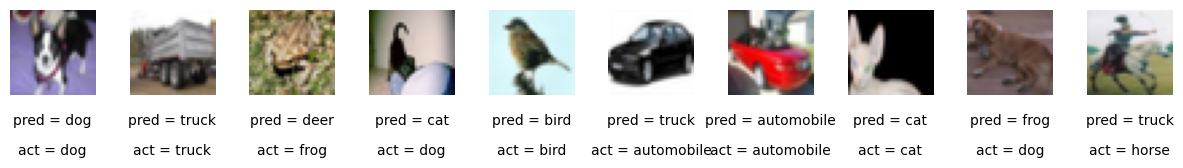

In [103]:
#We can view some of the images alongside their labels and predictions with the fol‐ lowing code. As expected, around half are correct:

import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module for plotting

# Number of images to show
n_to_show = 10

# Randomly select 'n_to_show' indices from the test dataset
indices = np.random.choice(range(len(x_test)), n_to_show)

# Create a figure with a specific size
fig = plt.figure(figsize=(15, 3))

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Loop through the selected indices
for i, idx in enumerate(indices):
    # Get the image from the test set at the selected index
    img = x_test[idx]
    
    # Add a subplot to the figure
    ax = fig.add_subplot(1, n_to_show, i+1)
    
    # Turn off the axis
    ax.axis('off')
    
    # Add text for the predicted label below the image
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    
    # Add text for the actual label below the image
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    
    # Display the image
    ax.imshow(img)

# Show the plot
plt.show()


In [ ]:
#Improving the Model
#One of the reasons our network isn’t yet performing as well as it might is because there isn’t anything in the network that takes into account the spatial structure of the input images. In fact, our first step is to flatten the image into a single vector, so that we can pass it to the first Dense layer!
#To achieve this we need to use a convolutional layer.

In [105]:
#Convolutional Layers
#First, we need to understand what is meant by a convolution in the context of deep learning.
#Figure 2-10 shows a 3 × 3 × 1 portion of a grayscale image being convoluted with a 3 × 3 × 1 filter (or kernel).

In [107]:
#The convolution is performed by multiplying the filter pixelwise with the portion of the image, and summming the result. The output is more positive when the portion of the image closely matches the filter and more negative when the portion of the image is the inverse of the filter.

In [109]:
#If we move the filter across the entire image, from left to right and top to bottom, recording the convolutional output as we go, we obtain a new array that picks out a particular feature of the input, depending on the values in the filter.

In [2]:
#input_layer = Input(shape=(64,64,1))
conv_layer_1 = Conv2D(
        filters = 2
        , kernel_size = (3,3)
        , strides = 1
        , padding = "same"
        )(input_layer)

NameError: name 'Conv2D' is not defined

In [113]:
#Strides: The strides parameter is the step size used by the layer to move the filters across the input. Increasing the stride therefore reduces the size of the output tensor. For exam‐ ple, when strides = 2, the height and width of the output tensor will be half the size of the input tensor. This is useful for reducing the spatial size of the tensor as it passes through the network, while increasing the number of channels.

In [115]:
#Padding
#The padding = "same" input parameter pads the input data with zeros so that the output size from the layer is exactly the same as the input size when strides = 1.

In [117]:
#This example demonstrates how we can chain convolutional layers together to create a convolutional neural network. Before we see how this compares in accuracy to our densely connected neural network, 
#I’m going to introduce two more layer types that can also improve performance: BatchNormalization and Dropout.

In [119]:
#Batch Normalization
#One common problem when training a deep neural network is ensuring that the weights of the network remain within a reasonable range of values—if they start to become too large, this is a sign that your network is suffering from what is known as the exploding gradient problem.

In [121]:
#As errors are propagated backward through the network, the calculation of the gradient in the earlier layers can sometimes grow exponentially large, causing wild fluctuations in the weight values. If your loss func‐ tion starts to return NaN, chances are that your weights have grown large enough to cause an overflow error.

In [123]:
#This doesn’t necessarily happen immediately as you start training the network. Some‐ times your network can be happily training for hours when suddenly the loss func‐ tion returns NaN and your network has exploded. This can be incredibly annoying, especially when the network has seemingly been training well for a long time. To pre‐ vent this from happening, you need to understand the root cause of the exploding gradient problem.


In [125]:
#One of the reasons for scaling input data into a neural network is to ensure a stable start to training over the first few iterations. Since the weights of the network are ini‐ tially randomized, unscaled input could potentially create huge activation values that immediately lead to exploding gradients. For example, instead of passing pixel values from 0–255 into the input layer, we usually scale these values to between –1 and 1.

In [127]:
#Covariate shift

In [129]:
#Because the input is scaled, it’s natural to expect the activations from all future layers to be relatively well scaled as well. Initially, this may be true, but as the network trains and the weights move further away from their random initial values, this assumption can start to break down. This phenomenon is known as covariate shift.

In [131]:
#Batch Normalisation:
#Batch normalization is a solution that drastically reduces this problem. The solution is surprisingly simple. A batch normalization layer calculates the mean and standard deviation of each of its input channels across the batch and normalizes by subtracting the mean and dividing by the standard deviation. There are then two learned param‐ eters for each channel, the scale (gamma) and shift (beta). The output is simply the normalized input, scaled by gamma and shifted by beta. Figure 2-15 shows the whole process.

In [133]:
#How many parameters are contained within a batch normalization layer? For every channel in the preceding layer, two weights need to be learned: the scale (gamma) and shift (beta). These are the trainable parameters. The moving average and standard deviation also need to be calculated for each channel but since they are derived from the data passing through the layer rather than trained through backpropagation, they are called nontrainable parameters. In total, this gives four parameters for each chan‐ nel in the preceding layer, where two are trainable and two are nontrainable.

In [135]:
In Keras, the BatchNormalization layer implements the batch normalization functionality:
BatchNormalization(momentum = 0.9)
The momentum parameter is the weight given to the previous value when calculating
the moving average and moving standard deviation.

SyntaxError: invalid syntax (2403284103.py, line 1)

In [137]:
Droupout Layers
When studying for an exam, it is common practice for students to use past papers and sample questions to improve their knowledge of the subject material. Some stu‐ dents try to memorize the answers to these questions, but then come unstuck in the exam because they haven’t truly understood the subject matter. The best students use the practice material to further their general understanding, so that they are still able to answer correctly when faced with new questions that they haven’t seen before.
The same principle holds for machine learning. Any successful machine learning algorithm must ensure that it generalizes to unseen data, rather than simply remem‐ bering the training dataset. If an algorithm performs well on the training dataset, but not the test dataset, we say that it is suffering from overfitting. To counteract this problem, we use regularization techniques, which ensure that the model is penalized if it starts to overfit.

SyntaxError: invalid character '‐' (U+2010) (3223508155.py, line 2)

In [139]:
There are many ways to regularize a machine learning algorithm, but for deep learn‐ ing, 
one of the most common is by using dropout layers.

SyntaxError: invalid character '‐' (U+2010) (2261466855.py, line 1)

In [141]:
Dropout layers are very simple. During training, each dropout layer chooses a ran‐ dom set of units from the preceding layer and sets their output to zero

SyntaxError: invalid character '‐' (U+2010) (3442789455.py, line 1)

In [143]:
There are no weights to learn within a dropout layer, as the units to drop are decided stochastically. At test time, the dropout layer doesn’t drop any units, so that the full network is used to make predictions.


SyntaxError: invalid character '’' (U+2019) (3664398195.py, line 1)

In [145]:
The Dropout layer in Keras implements this functionality, with the rate parameter specifying the proportion of units to drop from the preceding layer:
    Dropout(rate = 0.25)
Dropout layers are used most commonly after Dense layers since these are most prone to overfitting due to the higher number of weights, though you can also use them after convolutional layers.

SyntaxError: invalid syntax (990970019.py, line 1)

In [148]:
The order in which to use the BatchNormalization and Activa tion layers is a matter of preference. I like to place the BatchNorm alization before the Activation, but some successful architectures use these layers the other way around. If you do choose to use BatchNormalization before Activation then you can remember the order using the acronym BAD (BatchNormaliza tion, Activation then Dropout)!

SyntaxError: invalid syntax (3249049140.py, line 1)